In [1]:
# import necessary libraries
import pandas as pd
import pandas as pd
import numpy as np
import ast
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
individualAllMetrics = pd.read_csv('./playerAllMetrics.csv')
individualAllMetrics.head()

,gameId,teamId,participantId,teamPosition,win,gameDuration,playerNumericalRank,goldEarned,champExperience,kills,...,turretKills,epicMonsterKills,visionScore,totalMinionsKilled,playerTotalIndegree,playerTotalOutdegree,goldPerMin,totalMinionsPerMin,visionScorePerMin,champExpPerMin
0,EUW1_7056642171,100,1,TOP,0,31.816667,13,13186,17614,7,...,2,0,18,238,2,4,414.436878,7.480356,0.565741,553.609219
1,EUW1_7056642171,100,2,JUNGLE,0,31.816667,13,14054,16470,8,...,1,1,27,53,17,17,441.718177,1.665794,0.848612,517.653222
2,EUW1_7056642171,100,3,MIDDLE,0,31.816667,14,12779,13825,10,...,1,0,15,163,13,11,401.644840,5.123101,0.471451,434.520691
3,EUW1_7056642171,100,4,BOTTOM,0,31.816667,12,14540,14832,10,...,3,0,13,208,18,13,456.993190,6.537454,0.408591,466.170770
4,EUW1_7056642171,100,5,UTILITY,0,31.816667,13,9820,11269,4,...,0,0,19,42,11,17,308.643269,1.320063,0.597171,354.185437


In [3]:
for col in individualAllMetrics.columns:
    print(col)

gameId
teamId
participantId
teamPosition
win
gameDuration
playerNumericalRank
goldEarned
champExperience
kills
deaths
assists
turretKills
epicMonsterKills
visionScore
totalMinionsKilled
playerTotalIndegree
playerTotalOutdegree
goldPerMin
totalMinionsPerMin
visionScorePerMin
champExpPerMin


In [4]:
# formulate individual metrics normalized w.r.t team and match level totals

totalMatchShares = individualAllMetrics.groupby(['gameId'])[['kills', 'epicMonsterKills', 'turretKills', 'goldEarned', 'champExperience', 'totalMinionsKilled']].sum().reset_index()
totalMatchShares.rename(columns = {'kills': 'totalMatchKills', 'epicMonsterKills': 'totalMatchEpicMonsterKills', 'turretKills': 'totalMatchTurretKills', 'goldEarned': 'totalMatchGold', 'champExperience': 'totalMatchChampExperience', 'totalMinionsKilled': 'totalMatchMinionsKilled'}, inplace=True)
individualAllMetrics = individualAllMetrics.merge(totalMatchShares, on=['gameId'], how='inner')
print(individualAllMetrics.shape)

totalTeamShares = individualAllMetrics.groupby(['gameId', 'teamId'])[['kills', 'epicMonsterKills', 'turretKills', 'goldEarned', 'champExperience', 'totalMinionsKilled']].sum().reset_index()
totalTeamShares.rename(columns = {'kills': 'totalTeamKills', 'epicMonsterKills': 'totalTeamEpicMonsterKills', 'turretKills': 'totalTeamTurretKills', 'goldEarned': 'totalTeamGold', 'champExperience': 'totalTeamChampExperience', 'totalMinionsKilled': 'totalTeamMinionsKilled'}, inplace=True)
individualAllMetrics = individualAllMetrics.merge(totalTeamShares, on=['gameId', 'teamId'], how='inner')
print(individualAllMetrics.shape)

individualAllMetrics.head()

def calculatePlayersShare(row, individualMetric, overallMetric):
    if row[overallMetric] == 0:
        return 0
    else:
        return row[individualMetric] / row[overallMetric]

individualAllMetrics['playersTeamGoldShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('goldEarned', 'totalTeamGold'))
individualAllMetrics['playersMatchGoldShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('goldEarned', 'totalMatchGold'))

individualAllMetrics['playersTeamExpShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('champExperience','totalTeamChampExperience'))
individualAllMetrics['playersMatchExpShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('champExperience', 'totalMatchChampExperience'))

individualAllMetrics['playersTeamKillShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('kills', 'totalTeamKills'))
individualAllMetrics['playersMatchKillShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('kills', 'totalMatchKills'))

individualAllMetrics['playersTeamTurretShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('turretKills', 'totalTeamTurretKills'))
individualAllMetrics['playersMatchTurretShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('turretKills','totalMatchTurretKills'))

individualAllMetrics['playersTeamEpicMonsterShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('epicMonsterKills', 'totalTeamEpicMonsterKills'))
individualAllMetrics['playersMatchEpicMonsterShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('epicMonsterKills', 'totalMatchEpicMonsterKills'))

individualAllMetrics['playersTeamMinionsShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('totalMinionsKilled', 'totalTeamMinionsKilled'))
individualAllMetrics['playersMatchMinionsShare'] = individualAllMetrics.apply(calculatePlayersShare, axis=1, args=('totalMinionsKilled','totalMatchMinionsKilled'))

individualAllMetrics.to_csv('./individualData.csv', index=False)


(34890, 28)
(34890, 34)


In [5]:
individualAllMetrics.columns

Index(['gameId', 'teamId', 'participantId', 'teamPosition', 'win',
       'gameDuration', 'playerNumericalRank', 'goldEarned', 'champExperience',
       'kills', 'deaths', 'assists', 'turretKills', 'epicMonsterKills',
       'visionScore', 'totalMinionsKilled', 'playerTotalIndegree',
       'playerTotalOutdegree', 'goldPerMin', 'totalMinionsPerMin',
       'visionScorePerMin', 'champExpPerMin', 'totalMatchKills',
       'totalMatchEpicMonsterKills', 'totalMatchTurretKills', 'totalMatchGold',
       'totalMatchChampExperience', 'totalMatchMinionsKilled',
       'totalTeamKills', 'totalTeamEpicMonsterKills', 'totalTeamTurretKills',
       'totalTeamGold', 'totalTeamChampExperience', 'totalTeamMinionsKilled',
       'playersTeamGoldShare', 'playersMatchGoldShare', 'playersTeamExpShare',
       'playersMatchExpShare', 'playersTeamKillShare', 'playersMatchKillShare',
       'playersTeamTurretShare', 'playersMatchTurretShare',
       'playersTeamEpicMonsterShare', 'playersMatchEpicMonsterSha

### Check for Collinearity using Correlation Coefficient Analysis

In [6]:
from scipy import stats

# Correlation matrix
individualDF_features = individualAllMetrics[[
                        'playerNumericalRank', 'goldEarned', 'champExperience',
                        'kills', 'deaths', 'assists', 'turretKills', 'epicMonsterKills',
                        'visionScore', 'totalMinionsKilled', 'playerTotalIndegree',
                        'playerTotalOutdegree', 'goldPerMin', 'totalMinionsPerMin',
                        'visionScorePerMin', 'champExpPerMin', 'totalMatchKills',
                        'totalMatchEpicMonsterKills', 'totalMatchTurretKills', 'totalMatchGold',
                        'totalMatchChampExperience', 'totalMatchMinionsKilled',
                        'totalTeamKills', 'totalTeamEpicMonsterKills', 'totalTeamTurretKills',
                        'totalTeamGold', 'totalTeamChampExperience', 'totalTeamMinionsKilled',
                        'playersTeamGoldShare', 'playersMatchGoldShare', 'playersTeamExpShare',
                        'playersMatchExpShare', 'playersTeamKillShare', 'playersMatchKillShare',
                        'playersTeamTurretShare', 'playersMatchTurretShare',
                        'playersTeamEpicMonsterShare', 'playersMatchEpicMonsterShare',
                        'playersTeamMinionsShare', 'playersMatchMinionsShare'
                    ]]

correlation_matrix = individualDF_features.corr()

# Function to calculate p-values
def correlation_test(x, y):
    return stats.pearsonr(x, y)

# Calculating p-values
p_values = pd.DataFrame(index=individualDF_features.columns, columns=individualDF_features.columns)

for col1 in individualDF_features.columns:
    for col2 in individualDF_features.columns:
        if col1 == col2:
            p_values[col1][col2] = np.nan  # NaN for the diagonal
        else:
            corr_test = correlation_test(individualDF_features[col1], individualDF_features[col2])
            p_values[col1][col2] = corr_test[1]  # Extract the p-value

# print(p_values)

print("Correlation Matrix:")

correlation_matrix

/tmp/ipykernel_71996/3446818266.py:33: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  p_values[col1][col2] = np.nan  # NaN for the diagonal
/tmp/ipykernel_71996/3446818266.py:36: FutureWarning: ChainedAssignmentError: behaviour will change in

Correlation Matrix:


,playerNumericalRank,goldEarned,champExperience,kills,deaths,assists,turretKills,epicMonsterKills,visionScore,totalMinionsKilled,...,playersTeamExpShare,playersMatchExpShare,playersTeamKillShare,playersMatchKillShare,playersTeamTurretShare,playersMatchTurretShare,playersTeamEpicMonsterShare,playersMatchEpicMonsterShare,playersTeamMinionsShare,playersMatchMinionsShare
playerNumericalRank,1.000000,-0.055760,-0.120920,-0.043370,-0.115463,0.032234,0.011485,-0.009061,0.057387,0.032722,...,2.053369e-02,2.742426e-02,2.383054e-02,2.898482e-02,0.013921,1.936089e-02,0.004483,8.172056e-03,1.359852e-02,1.458106e-02
goldEarned,-0.055760,1.000000,0.878023,0.789868,0.101536,0.062000,0.484844,0.253529,-0.185497,0.520668,...,5.102036e-01,5.812903e-01,5.593771e-01,6.188128e-01,0.313929,4.168408e-01,0.164825,1.714704e-01,3.680402e-01,3.770097e-01
champExperience,-0.120920,0.878023,1.000000,0.542800,0.100572,0.139164,0.377591,0.244205,-0.110663,0.489008,...,5.506516e-01,6.185904e-01,2.804238e-01,3.527298e-01,0.226652,3.024395e-01,0.130773,1.441419e-01,3.075494e-01,3.152947e-01
kills,-0.043370,0.789868,0.542800,1.000000,0.012643,-0.070333,0.345635,0.226332,-0.236374,0.303659,...,4.275856e-01,5.101258e-01,8.241214e-01,8.966772e-01,0.204695,3.219550e-01,0.174026,1.968310e-01,2.600125e-01,2.660537e-01
deaths,-0.115463,0.101536,0.100572,0.012643,1.000000,0.030213,-0.159173,-0.096738,0.058666,0.007983,...,-1.905245e-01,-3.540556e-01,-6.115401e-02,-2.127677e-01,-0.046462,-2.118643e-01,-0.060876,-1.537988e-01,-5.328741e-02,-6.125710e-02
assists,0.032234,0.062000,0.139164,-0.070333,0.030213,1.000000,-0.096726,0.082516,0.570712,-0.342857,...,-3.543244e-01,-1.696925e-01,-3.368660e-01,-2.087427e-01,-0.210472,-1.140425e-01,0.024850,4.717904e-02,-4.198131e-01,-4.143259e-01
turretKills,0.011485,0.484844,0.377591,0.345635,-0.159173,-0.096726,1.000000,-0.033816,-0.218388,0.458094,...,3.486560e-01,4.824953e-01,2.260507e-01,3.549925e-01,0.739891,9.676798e-01,-0.092053,-3.705171e-02,4.367340e-01,4.476366e-01
epicMonsterKills,-0.009061,0.253529,0.244205,0.226332,-0.096738,0.082516,-0.033816,1.000000,-0.055672,-0.347645,...,1.377906e-01,2.262325e-01,1.410506e-01,2.123388e-01,-0.110129,-3.951190e-02,0.857489,9.500622e-01,-3.880473e-01,-3.854162e-01
visionScore,0.057387,-0.185497,-0.110663,-0.236374,0.058666,0.570712,-0.218388,-0.055672,1.000000,-0.464042,...,-5.733979e-01,-4.774417e-01,-3.544865e-01,-3.088094e-01,-0.263108,-2.344995e-01,-0.091156,-8.163822e-02,-5.430630e-01,-5.402400e-01
totalMinionsKilled,0.032722,0.520668,0.489008,0.303659,0.007983,-0.342857,0.458094,-0.347645,-0.464042,1.000000,...,5.341074e-01,4.796976e-01,2.839573e-01,2.732014e-01,0.445137,4.265207e-01,-0.398028,-3.715304e-01,9.488451e-01,9.521944e-01


### Check for multi-collinearity using Variance Inflation Factor

In [7]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# using original set of metrics before, we had share of the match
individualDF_VIF_features = individualAllMetrics[[   
                        'win', 'playerNumericalRank', 'goldEarned', 'champExperience',
                        'kills', 'deaths', 'assists', 'turretKills', 'epicMonsterKills',
                        'visionScore', 'totalMinionsKilled', 'playerTotalIndegree',
                        'playerTotalOutdegree', 'goldPerMin', 'totalMinionsPerMin',
                        'visionScorePerMin', 'champExpPerMin', 'totalMatchKills',
                        'totalMatchEpicMonsterKills', 'totalMatchTurretKills', 'totalMatchGold',
                        'totalMatchChampExperience', 'totalMatchMinionsKilled',
                        'totalTeamKills', 'totalTeamEpicMonsterKills', 'totalTeamTurretKills',
                        'totalTeamGold', 'totalTeamChampExperience', 'totalTeamMinionsKilled',
                        'playersTeamGoldShare', 'playersMatchGoldShare', 'playersTeamExpShare',
                        'playersMatchExpShare', 'playersTeamKillShare', 'playersMatchKillShare',
                        'playersTeamTurretShare', 'playersMatchTurretShare',
                        'playersTeamEpicMonsterShare', 'playersMatchEpicMonsterShare',
                        'playersTeamMinionsShare', 'playersMatchMinionsShare'
                        ]]

# subset of features from teamDF that will be used for checking collinearity using VIF
y, X = dmatrices('win ~ playerNumericalRank+deaths+playersMatchTurretShare+playersMatchEpicMonsterShare+visionScorePerMin+playersMatchMinionsShare+champExpPerMin+playerTotalIndegree+playerTotalOutdegree', data=individualDF_VIF_features, return_type='dataframe')

In [8]:
vif_df = pd.DataFrame()
vif_df['variable'] = X.columns 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

,variable,VIF
0,Intercept,78.978045
1,playerNumericalRank,1.054228
2,deaths,1.172095
3,playersMatchTurretShare,1.494967
4,playersMatchEpicMonsterShare,2.117263
5,visionScorePerMin,2.318719
6,playersMatchMinionsShare,3.179670
7,champExpPerMin,2.271816
8,playerTotalIndegree,1.610522
9,playerTotalOutdegree,1.532413


### The above results from VIF is a good set of input variables to take, since, all parameters have VIF less than 5, and we have discounted gold which is superfluous and assists which is more or less similar to outdegree

# Fitting and Prediction Using Individual Level Game Metrics

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
# splitting games into train-test split; 
# we use an additional filter at the top to ensure that both train-test have same number number of win outcomes, sampling equally!
individualDF = individualAllMetrics[['teamId', 'gameId', 'participantId', 'teamPosition', 'win', 'playersMatchTurretShare','champExpPerMin','visionScorePerMin','playersMatchMinionsShare','playerTotalIndegree','playerTotalOutdegree']]


game_ids = individualDF['gameId'].unique()
train_games, test_games = train_test_split(game_ids, test_size=0.2, random_state=176)

train_df = individualDF[individualDF['gameId'].isin(train_games)]
test_df = individualDF[individualDF['gameId'].isin(test_games)]

X_train = train_df[['playersMatchTurretShare','champExpPerMin','visionScorePerMin','playersMatchMinionsShare','playerTotalIndegree','playerTotalOutdegree']]
y_train = train_df['win']

X_test = test_df[['playersMatchTurretShare','champExpPerMin','visionScorePerMin','playersMatchMinionsShare','playerTotalIndegree','playerTotalOutdegree']]
y_test = test_df['win']

features_names = X_train.columns

### Binary Logistic Regression

In [11]:
# check for results with and without scaling
# Scaling data features to avoid model skewing; performing scaling may not be necessary, because we have transformed the data!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [12]:
# Fit the model
model = LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(X_train, y_train) # use X_train_scaled to fit instead

features_names = X_train.columns
coefficients = model.coef_
importances = coefficients[0]
blr_feature_importances = dict(zip(features_names, importances))

y_pred = model.predict(X_test)

In [13]:
# p-values using statsmodels
import statsmodels.api as sm
X = sm.add_constant(X_train) # adding a constant intercept term
logit_model = sm.Logit(y_train, X).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.422678
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    win   No. Observations:                27910
Model:                          Logit   Df Residuals:                    27903
Method:                           MLE   Df Model:                            6
Date:                Thu, 22 Aug 2024   Pseudo R-squ.:                  0.3902
Time:                        17:00:29   Log-Likelihood:                -11797.
converged:                       True   LL-Null:                       -19346.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.8482      0.149    -59.341      0.000      -9.140

In [14]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate classification report
class_report = classification_report(y_test, y_pred)

print(blr_feature_importances)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

{'playersMatchTurretShare': np.float64(9.516236869534403), 'champExpPerMin': np.float64(0.01204958275583887), 'visionScorePerMin': np.float64(0.3754022269864125), 'playersMatchMinionsShare': np.float64(-5.124248808833136), 'playerTotalIndegree': np.float64(0.01556178128530209), 'playerTotalOutdegree': np.float64(0.15534952685130696)}
Accuracy: 0.820487106017192
Confusion Matrix:
 [[2895  595]
 [ 658 2832]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82      3490
           1       0.83      0.81      0.82      3490

    accuracy                           0.82      6980
   macro avg       0.82      0.82      0.82      6980
weighted avg       0.82      0.82      0.82      6980



In [15]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)
dt_importances = dtmodel.feature_importances_
feature_importances = dict(zip(features_names, dt_importances))


dt_y_pred = dtmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, dt_y_pred)

# Calculate classification report
class_report = classification_report(y_test, dt_y_pred)

print(feature_importances)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

{'playersMatchTurretShare': np.float64(0.1989792020080218), 'champExpPerMin': np.float64(0.20839901555066848), 'visionScorePerMin': np.float64(0.12171341900899288), 'playersMatchMinionsShare': np.float64(0.14195976069060948), 'playerTotalIndegree': np.float64(0.07460945076164095), 'playerTotalOutdegree': np.float64(0.2543391519800664)}
Accuracy: 0.7467048710601719
Confusion Matrix:
 [[2659  831]
 [ 937 2553]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      3490
           1       0.75      0.73      0.74      3490

    accuracy                           0.75      6980
   macro avg       0.75      0.75      0.75      6980
weighted avg       0.75      0.75      0.75      6980



### Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)
dt_importances = dtmodel.feature_importances_
feature_importances = dict(zip(features_names, dt_importances))


dt_y_pred = dtmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, dt_y_pred)

# Calculate classification report
class_report = classification_report(y_test, dt_y_pred)

print(feature_importances)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

{'playersMatchTurretShare': np.float64(0.20056605036310154), 'champExpPerMin': np.float64(0.2108192215246035), 'visionScorePerMin': np.float64(0.12295770400666811), 'playersMatchMinionsShare': np.float64(0.14014577128761038), 'playerTotalIndegree': np.float64(0.07243463041895497), 'playerTotalOutdegree': np.float64(0.2530766223990616)}
Accuracy: 0.7492836676217765
Confusion Matrix:
 [[2676  814]
 [ 936 2554]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75      3490
           1       0.76      0.73      0.74      3490

    accuracy                           0.75      6980
   macro avg       0.75      0.75      0.75      6980
weighted avg       0.75      0.75      0.75      6980



### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfmodel = RandomForestClassifier(n_estimators=16, max_depth=8, bootstrap=True)
rfmodel.fit(X_train, y_train)
rf_importances = rfmodel.feature_importances_ 
rf_feature_importances = dict(zip(features_names, rf_importances))
rf_y_pred = rfmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Calculate classification report
class_report = classification_report(y_test, rf_y_pred)

print(rf_feature_importances)
print('RF Accuracy:', accuracy)
print('RF Confusion Matrix:\n', conf_matrix)
print('RF Classification Report:\n', class_report)

{'playersMatchTurretShare': np.float64(0.22583991819982988), 'champExpPerMin': np.float64(0.2545339457167242), 'visionScorePerMin': np.float64(0.055644246667514476), 'playersMatchMinionsShare': np.float64(0.04461060325619191), 'playerTotalIndegree': np.float64(0.08614255434275558), 'playerTotalOutdegree': np.float64(0.33322873181698404)}
RF Accuracy: 0.8220630372492836
RF Confusion Matrix:
 [[2809  681]
 [ 561 2929]]
RF Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      3490
           1       0.81      0.84      0.83      3490

    accuracy                           0.82      6980
   macro avg       0.82      0.82      0.82      6980
weighted avg       0.82      0.82      0.82      6980



In [18]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    n_estimators = 100,
    eval_metric='logloss',
    learning_rate = 0.05
)

xgb_model.fit(X_train, y_train)
xgb_importances = xgb_model.feature_importances_ 
xgb_feature_importances = dict(zip(features_names, xgb_importances))

xgb_y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_y_pred)

# Calculate classification report
class_report = classification_report(y_test, xgb_y_pred)

print(xgb_feature_importances)
print('XGB Accuracy:', accuracy)
print('XGB Confusion Matrix:\n', conf_matrix)
print('XGB Classification Report:\n', class_report)

{'playersMatchTurretShare': np.float32(0.32475963), 'champExpPerMin': np.float32(0.116129756), 'visionScorePerMin': np.float32(0.02416069), 'playersMatchMinionsShare': np.float32(0.0494885), 'playerTotalIndegree': np.float32(0.02819671), 'playerTotalOutdegree': np.float32(0.45726475)}
XGB Accuracy: 0.829512893982808
XGB Confusion Matrix:
 [[2846  644]
 [ 546 2944]]
XGB Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83      3490
           1       0.82      0.84      0.83      3490

    accuracy                           0.83      6980
   macro avg       0.83      0.83      0.83      6980
weighted avg       0.83      0.83      0.83      6980



# Dimensionality Reduction - Using Scree and Factor Analysis

In [19]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

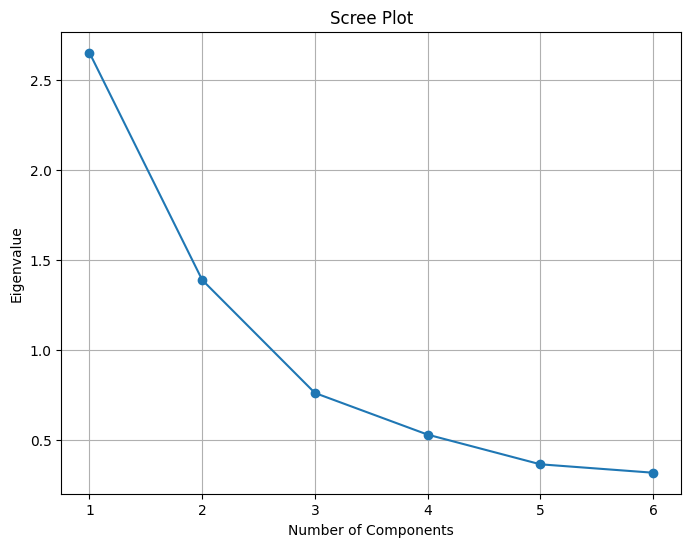

In [20]:
# scale features
features = individualDF[['playersMatchTurretShare','champExpPerMin','visionScorePerMin','playersMatchMinionsShare','playerTotalIndegree','playerTotalOutdegree']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA()
pca.fit(features_scaled)


# Plot the Scree Plot
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

### Results from Scree plot suggests that the number of latent components to be 2, since eigen value falls below value 1 after 2 components

In [21]:
# performing KMO test on the dataset to see if dataframe is suitable for factor analysis
from factor_analyzer import calculate_kmo

kmo_all, kmo_model = calculate_kmo(features_scaled)

# Print the results
print(f"KMO Overall: {kmo_model:.4f}")

# If you want to see individual KMO values for each variable:
print("Individual KMO values:\n", kmo_all)

KMO Overall: 0.6847
Individual KMO values:
 [0.73314536 0.72556492 0.67263039 0.717856   0.62604734 0.56619337]


### On account of the result values of KMO Test, I further reduced the number of initial 9 features taken during VIF test, so that KMO > 0.6 is a good fit

In [22]:
# Perform Factor Analysis
fa = FactorAnalysis(n_components=2, rotation='varimax')  # Adjust n_components based on Scree Plot; making the number of components as 2, because we dont see a good distinction of features with 3 latent factors
fa.fit(features_scaled)
factor_loadings = fa.components_.T

# factor loadings for each feature column
loadings_df = pd.DataFrame(factor_loadings, index=features.columns, columns=[f'Factor{i+1}' for i in range(factor_loadings.shape[1])])

# compute factor scores
factor_scores = fa.transform(features_scaled)
factor_scores_df = pd.DataFrame(factor_scores, columns=[f'Factor{i+1}' for i in range(factor_scores.shape[1])])

In [23]:
loadings_df

,Factor1,Factor2
playersMatchTurretShare,-0.555940,-0.111829
champExpPerMin,-0.835788,-0.148082
visionScorePerMin,0.445957,0.658908
playersMatchMinionsShare,-0.484556,-0.543142
playerTotalIndegree,-0.559596,0.101328
playerTotalOutdegree,-0.094309,0.764303


In [24]:
# Use BLR on computed factor scores
y = individualDF['win']
X = factor_scores_df

print(X.shape)
print(y.shape)

# splitting games into train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LogisticRegression(solver='lbfgs', max_iter=400)
model.fit(X_train, y_train) # use X_train_scaled to fit instead

features_names = X_train.columns
coefficients = model.coef_
importances = coefficients[0]
blr_feature_importances = dict(zip(features_names, importances))

y_pred = model.predict(X_test)

(34890, 2)
(34890,)


In [25]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate classification report
class_report = classification_report(y_test, y_pred)

print(blr_feature_importances)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

{'Factor1': np.float64(-1.8411657706411202), 'Factor2': np.float64(1.5403795007673005)}
Accuracy: 0.7992261392949269
Confusion Matrix:
 [[2773  749]
 [ 652 2804]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      3522
           1       0.79      0.81      0.80      3456

    accuracy                           0.80      6978
   macro avg       0.80      0.80      0.80      6978
weighted avg       0.80      0.80      0.80      6978



In [26]:
# decision tree classifier

dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)
dt_importances = dtmodel.feature_importances_
feature_importances = dict(zip(features_names, dt_importances))


dt_y_pred = dtmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, dt_y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, dt_y_pred)

# Calculate classification report
class_report = classification_report(y_test, dt_y_pred)

print(feature_importances)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

{'Factor1': np.float64(0.5575060061086567), 'Factor2': np.float64(0.44249399389134325)}
Accuracy: 0.7185439954141588
Confusion Matrix:
 [[2526  996]
 [ 968 2488]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72      3522
           1       0.71      0.72      0.72      3456

    accuracy                           0.72      6978
   macro avg       0.72      0.72      0.72      6978
weighted avg       0.72      0.72      0.72      6978



In [27]:
# random forest classifier

rfmodel = RandomForestClassifier(n_estimators=16, max_depth=8, bootstrap=True)
rfmodel.fit(X_train, y_train)
rf_importances = rfmodel.feature_importances_ 
rf_feature_importances = dict(zip(features_names, rf_importances))
rf_y_pred = rfmodel.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, rf_y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Calculate classification report
class_report = classification_report(y_test, rf_y_pred)

print(rf_feature_importances)
print('RF Accuracy:', accuracy)
print('RF Confusion Matrix:\n', conf_matrix)
print('RF Classification Report:\n', class_report)

{'Factor1': np.float64(0.5772082516951144), 'Factor2': np.float64(0.4227917483048857)}
RF Accuracy: 0.8013757523645744
RF Confusion Matrix:
 [[2673  849]
 [ 537 2919]]
RF Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.76      0.79      3522
           1       0.77      0.84      0.81      3456

    accuracy                           0.80      6978
   macro avg       0.80      0.80      0.80      6978
weighted avg       0.80      0.80      0.80      6978



In [28]:
# XG Boost Classifier

xgb_model = xgb.XGBClassifier(
    objective = 'binary:logistic',
    n_estimators = 100,
    eval_metric='logloss',
    learning_rate = 0.05
)

xgb_model.fit(X_train, y_train)
xgb_importances = xgb_model.feature_importances_ 
xgb_feature_importances = dict(zip(features_names, xgb_importances))

xgb_y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, xgb_y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, xgb_y_pred)

# Calculate classification report
class_report = classification_report(y_test, xgb_y_pred)

print(xgb_feature_importances)
print('XGB Accuracy:', accuracy)
print('XGB Confusion Matrix:\n', conf_matrix)
print('XGB Classification Report:\n', class_report)

{'Factor1': np.float32(0.633949), 'Factor2': np.float32(0.36605102)}
XGB Accuracy: 0.7992261392949269
XGB Confusion Matrix:
 [[2649  873]
 [ 528 2928]]
XGB Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      3522
           1       0.77      0.85      0.81      3456

    accuracy                           0.80      6978
   macro avg       0.80      0.80      0.80      6978
weighted avg       0.80      0.80      0.80      6978



### Interesting point here, is that because we are deriving winning outcomes based on individual performance; the relative importance by all methods for recieving factor (Factor1) has higher importance than the giving factor (Factor2)